In [1]:
import pandas as pd
import numpy as np

In [2]:
census_df = pd.read_csv("census.csv")
census_df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [12]:
only_country = census_df[census_df["SUMLEV"] == 50]

def top(df, n=3, column="CENSUS2010POP"):
    return df.sort_values(column, ascending=False)[:n][column].sum()

grouped = only_country[["STNAME", "CTYNAME", "CENSUS2010POP"]].groupby('STNAME').apply(top)
grouped.sort_values(ascending=False)[:3].index.tolist()

['California', 'Texas', 'Illinois']

In [28]:
census_df = pd.read_csv('census.csv')
only_country = census_df[census_df["SUMLEV"] == 50]

def get_change(row):
    pop_year = row[["POPESTIMATE2010",
                   "POPESTIMATE2011",
                   "POPESTIMATE2012",
                   "POPESTIMATE2013",
                   "POPESTIMATE2014",
                   "POPESTIMATE2015"]]
    return pop_year.max() - pop_year.min()

only_country.loc[only_country.apply(get_change, axis=1).argmax()]["CTYNAME"]

'Harris County'

In [59]:
country_df = census_df[census_df["SUMLEV"] == 50]

grouped_cnt = country_df.groupby("STNAME")["CTYNAME"].count().idxmax()
grouped_cnt

'Texas'

In [69]:
def get_change(row):
    pop_year = row[["POPESTIMATE2011",
                   "POPESTIMATE2012",
                   "POPESTIMATE2013",
                   "POPESTIMATE2014",
                   "POPESTIMATE2015"]]
    return pop_year.max() - pop_year.min()

only_country = census_df[census_df["SUMLEV"] == 50]
only_country.loc[only_country.apply(get_change, axis=1).idxmax()]["CTYNAME"]

'Harris County'

In [85]:
country_df = census_df[census_df["SUMLEV"] == 50]
stnames = country_df["STNAME"].unique()
stpops = []
for state in stnames:
    df = country_df[country_df["STNAME"] == state]
    top3_sum = df.nlargest(3, "CENSUS2010POP")["CENSUS2010POP"].sum()
    stpops.append(top3_sum)

pops_ser = pd.Series(stpops, index=stnames).sort_values(ascending=False)
ans_list = list(pops_ser[:3].index)
ans_list

['California', 'Texas', 'Illinois']

In [111]:
country_df = census_df[census_df["SUMLEV"] == 50]
stnames = country_df["STNAME"].unique()

stpops = []
for state in stnames:
    df = country_df[country_df["STNAME"] == state]
    top3_sum = df.nlargest(3, "CENSUS2010POP")["CENSUS2010POP"].sum()
    stpops.append(top3_sum)
    
pops_ser = pd.Series(stpops, index=stnames).sort_values(ascending=False)
ans_list = pops_ser[:3].index.tolist()
ans_list

['California', 'Texas', 'Illinois']

In [2]:
import pandas as pd

In [17]:
census_df = pd.read_csv("census.csv")
only_country = census_df[census_df["SUMLEV"] == 50]

def get_change(row):
    pop_year = row[["POPESTIMATE2011",
                   "POPESTIMATE2012",
                   "POPESTIMATE2013",
                   "POPESTIMATE2014",
                   "POPESTIMATE2015"]]
    return pop_year.max() - pop_year.min()
    
# only_country.apply(get_change, axis=1).max()
only_country.loc[only_country.apply(get_change, axis=1).idxmax()]["CTYNAME"]

'Harris County'

In [21]:
import pandas as pd

country_df = census_df[census_df["SUMLEV"] == 50]

region_filter = country_df["REGION"].isin([1,2])
pop_diff_filter = country_df["POPESTIMATE2015"] > country_df["POPESTIMATE2014"]
country_name_filter = country_df["CTYNAME"].str.contains("^Washington")

ans_df = country_df[region_filter & pop_diff_filter & country_name_filter]
# satisifier three conditions
ans_df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
896,50,2,4,19,183,Iowa,Washington County,21704,21704,21697,...,5.743693,2.468684,-0.364282,0.272171,1.849596,5.881542,2.560117,-0.273212,0.408256,1.984933
1419,50,2,4,27,163,Minnesota,Washington County,238136,238134,238995,...,2.555118,3.260957,2.285952,3.072543,0.678755,4.178076,4.907905,4.009584,5.040262,2.615204
2345,50,1,2,42,125,Pennsylvania,Washington County,207820,207820,207877,...,3.683135,3.260434,1.219337,2.113561,1.656917,4.062988,3.750219,1.742595,2.762039,2.305276
2355,50,1,1,44,9,Rhode Island,Washington County,126979,127094,127085,...,-4.669304,-2.659574,1.551904,1.400112,0.506035,-3.533527,-1.788880,2.462459,2.428442,1.533918
3163,50,2,3,55,131,Wisconsin,Washington County,131887,131885,131967,...,-0.794876,0.785279,-2.215465,1.601149,-0.434498,-0.431504,1.162817,-1.763330,2.104796,0.059931


,ID,Date,Element,Data_Value
0,JA000047827,2013-11-14,TMAX,206
1,JA000047843,2009-11-12,TMIN,157
2,JA000047610,2009-10-17,TMIN,89
3,JA000047843,2009-11-01,TMAX,202
4,JA000047640,2009-04-03,TMIN,-27


,ID,Date,Element,Data_Value
0,JA000047827,2013-11-14,TMAX,206
1,JA000047843,2009-11-12,TMIN,157
2,JA000047610,2009-10-17,TMIN,89
3,JA000047843,2009-11-01,TMAX,202
4,JA000047640,2009-04-03,TMIN,-27


In [98]:
def get_tmins_tmaxes():
    """
    getting tmins and tmaxes from 2005 to 2014
    """
    import pandas as pd
    data_url = "https://storage.googleapis.com/um_ds_intro/plotting_weather_patterns.csv"
    df = pd.read_csv(data_url)
    df["Date_Index"] = pd.to_datetime(df["Date"])
    df = df.set_index("Date_Index").sort_index()

    # remove February 29th
    is_feb_29th = df["Date"].str.contains("02-29")
    df = df[~is_feb_29th]

    # get unique month/day
    df["Month_Day"] = pd.to_datetime(df["Date"])
    df["Month_Day"] = df["Month_Day"].map(lambda x: x.strftime("%m-%d"))
    unique_month_day = df["Month_Day"].unique()

    # filter df from 2005 to 2014
    df = df.loc["2005":"2014"]

    # get tmin / tmax for each unique month day
    TMINS, TMAXES = [], []
    for md in unique_month_day:
        df_subset = df[df["Month_Day"] == md]
        tmin = df_subset[df_subset["Element"] == "TMIN"]["Data_Value"].min()
        tmax = df_subset[df_subset["Element"] == "TMAX"]["Data_Value"].max()
        TMINS.append(tmin / 10)
        TMAXES.append(tmax / 10)
    return TMINS,TMAXES

TMINS, TMAXES = get_tmins_tmaxes()

In [60]:
import matplotlib.pyplot as plt
import numpy as np

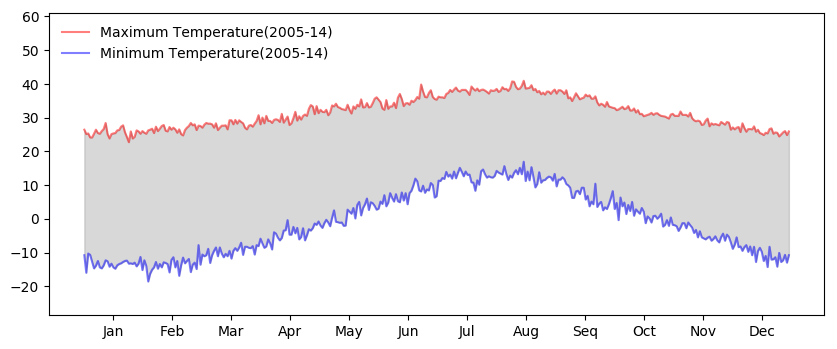

In [103]:
def plot_line_graph():
    """
    plotting a line graph
    """
    # plotting
    plt.figure(figsize=(10,4), dpi=100)
    
    # set background color
    ax = plt.gca()
    ax.set_facecolor("None")
    
    # plotting lines
    plt.plot(TMAXES, c=(1,0,0,.5), label= "Maximum Temperature(2005-14)")
    plt.plot(TMINS, c=(0,0,1,.5), label = "Minimum Temperature(2005-14)")
    
    # plotting shade area
    plt.fill_between(np.arange(365), TMINS, TMAXES, color="grey", alpha=.3)
    
    # adjusting xticks
    xticks = np.linspace(15, 365-15, 12)
    xtick_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Seq", "Oct", "Nov", "Dec"]
    plt.xticks(xticks, xtick_labels)
    
    # extending ylim
    plt.ylim(min(TMINS)-10, max(TMAXES) + 20)
    
    # Adding legend
    plt.legend(loc="upper left", frameon=False)
    plt.show()
    
plot_line_graph()

In [136]:
df = pd.read_csv("plotting_weather_patterns.csv")
df["Date_Index"] = pd.to_datetime(df["Date"])
df = df.set_index("Date_Index").sort_index()
df.loc["2014"]

,ID,Date,Element,Data_Value
Date_Index,,,,
2014-01-01,JA000047626,2014-01-01,TMIN,-12
2014-01-01,JA000047626,2014-01-01,TMAX,152
2014-01-01,JA000047762,2014-01-01,TMAX,118
2014-01-01,JA000047616,2014-01-01,TMIN,32
2014-01-01,JA000047899,2014-01-01,TMAX,123
2014-01-01,JA000047836,2014-01-01,TMAX,171
2014-01-01,JA000047762,2014-01-01,TMIN,101
2014-01-01,JA000047836,2014-01-01,TMIN,62
2014-01-01,JA000047829,2014-01-01,TMAX,152


In [137]:
def get_tmins_tmaxes_2015():
    #     """
    #     getting tmins and tmaxes in 2015
    #     """
    #     data_url = "https://storage.googleapis.com/um_ds_intro/plotting_weather_patterns.csv"
    #     df = pd.read_csv(data_url)
    df = pd.read_csv("plotting_weather_patterns.csv")
    df["Date_Index"] = pd.to_datetime(df["Date"])
    df = df.set_index("Date_Index").sort_index()
    df = df.loc["2015"]
    unique_idx = df.index.unique()

    TMINS, TMAXES = [], []
    for d in unique_idx:
        df_subset = df.loc[d]
        tmin = df_subset[df_subset["Element"] == "TMIN"]["Data_Value"].min()
        tmax = df_subset[df_subset["Element"] == "TMAX"]["Data_Value"].max()
        TMINS.append(tmin / 10)
        TMAXES.append(tmax / 10)
    return TMINS, TMAXES

TMINS_2015, TMAXES_2015 = get_tmins_tmaxes_2015()

In [139]:
def get_broken_records():
    """
    getting broken records in 2015
    """
    tmins,tmaxes= np.array(TMINS), np.array(TMAXES)

    tmins_2015, tmaxes_2015 = np.array(TMINS_2015), np.array(TMAXES_2015)
    
    is_record_lows = tmins_2015 < tmins
    is_record_highs = tmaxes_2015 > tmaxes
    
    record_lows = []
    record_low_x = []
    record_highs = []
    record_high_x = []
    
    for i in range(len(is_record_lows)):
        if is_record_lows[i]:
            record_lows.append(tmins_2015[i])
            record_low_x.append(i)
            
    for j in range(len(is_record_highs)):
        if is_record_highs[j]:
            record_highs.append(tmaxes_2015[j])
            record_high_x.append(j)
    
    return record_lows, record_low_x, record_highs, record_high_x

record_lows, record_low_x, record_highs, record_high_x = get_broken_records()

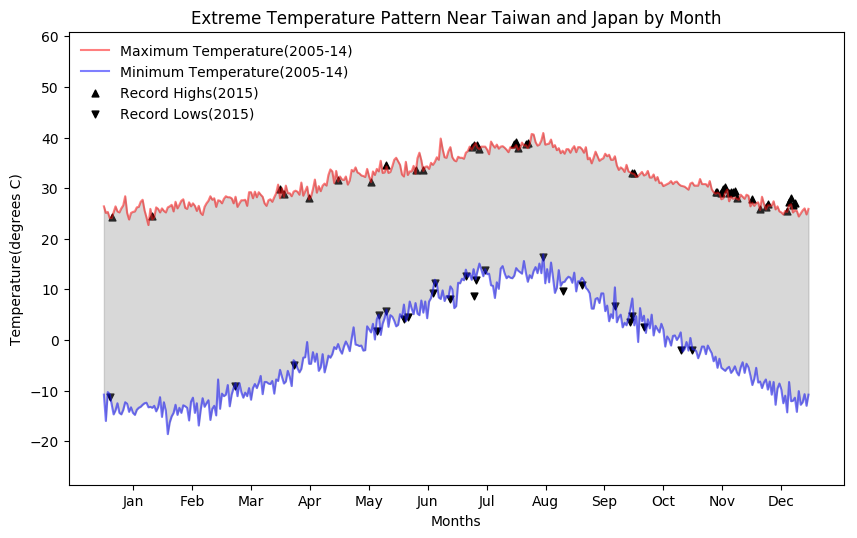

In [141]:
def plot_line_scatter():
    
    """
    plotting line graph with scatter points
    """
    
    plt.figure(figsize=(10,6),dpi=100)
    
    # set background color
    ax = plt.gca()
    ax.set_facecolor("None")
    
    # plotting line
    plt.plot(TMAXES, c=(1,0,0,0.5), label="Maximum Temperature(2005-14)")
    plt.plot(TMINS, c=(0,0,1,0.5), label="Minimum Temperature(2005-14)")
    
    # plotting points
    plt.scatter(record_high_x, record_highs, s=24, c="black", label="Record Highs(2015)", marker="^")
    plt.scatter(record_low_x, record_lows, s=24, c="black", label= "Record Lows(2015)", marker="v")
    
    # plotting shade area
    plt.fill_between(range(365), TMINS, TMAXES, color="grey", alpha=0.3)
    
    #adjusting xticks
    xticks = np.linspace(15, 365-15, 12)
    xtick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    plt.xticks(xticks, xtick_labels)
    
    # extending ylim
    plt.ylim(min(TMINS)-10, max(TMAXES) +20)
    
    plt.legend(loc="upper left",frameon=False)
    
    plt.xlabel("Months")
    plt.ylabel("Temperature(degrees C)")
    plt.title("Extreme Temperature Pattern Near Taiwan and Japan by Month")
    plt.show()
    
plot_line_scatter()

In [143]:
print("2015 有 {} 天创 10 年最低气温记录".format(len(record_lows)))
print("2015 有 {} 天创 10 年最高气温记录".format(len(record_highs)))

2015 有 24 天创 10 年最低气温记录
2015 有 40 天创 10 年最高气温记录


https://medium.com/pyradise/%E6%8E%A2%E7%B4%A2-2017-kaggle-%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8%E8%AA%BF%E6%9F%A5%E8%B3%87%E6%96%99-f03f1617ae5e

In [184]:
import pandas as pd
kaggle_survey_csv = "https://storage.googleapis.com/kaggle_survey/kagglesurvey.csv"
responses = pd.read_csv(kaggle_survey_csv)
responses.head()

,Respondent,WorkToolsSelect,LanguageRecommendationSelect,EmployerIndustry,WorkAlgorithmsSelect
0,1,"Amazon Web services,Oracle Data Mining/ Oracle...",F#,Internet-based,"Neural Networks,Random Forests,RNNs"
1,2,"Amazon Machine Learning,Amazon Web services,Cl...",Python,Mix of fields,"Bayesian Techniques,Decision Trees,Random Fore..."
2,3,"C/C++,Jupyter notebooks,MATLAB/Octave,Python,R...",Python,Technology,"Bayesian Techniques,CNNs,Ensemble Methods,Neur..."
3,4,"Jupyter notebooks,Python,SQL,TensorFlow",Python,Academic,"Bayesian Techniques,CNNs,Decision Trees,Gradie..."
4,5,"C/C++,Cloudera,Hadoop/Hive/Pig,Java,NoSQL,R,Un...",R,Government,NaN


In [150]:
tools_select = responses["WorkToolsSelect"].str.split(pat=",")
tools_select_1st = []
for i in tools_select:
    if not isinstance(i, list):
        tools_select_1st.append(str(i))
    else:
        for j in i:
            tools_select_1st.append(j)

print(len(tools_select_1st))


47409


In [165]:
tools_select_df = pd.DataFrame({
    "tools_select": tools_select_1st
})

grouped = tools_select_df.groupby("tools_select")
grouped.size().sort_values(ascending=False)[:10]

tools_select
Python                 6073
R                      4708
SQL                    4261
Jupyter notebooks      3206
TensorFlow             2256
nan                    2198
Amazon Web services    1868
Unix shell / awk       1854
Tableau                1619
C/C++                  1528
dtype: int64

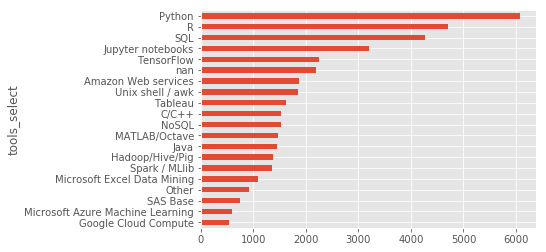

In [168]:
%matplotlib inline
plt.style.use("ggplot")
top20_tools = grouped.size().sort_values(ascending=False)[:20].sort_values()
top20_tools.plot.barh()

In [187]:
def select_py_r(x):
    """
    to determine whether the user selects r/python/both
    """
    if ("R" in x) & ("Python" in x):
        return "Both"
    
    elif ("R" not in x) & ("Python" in x):
        return "Python"
    
    elif ("R" in x) & ("Python" not in x):
        return "R"
    
    else:
        return "Neither"
    
work_tools_select = responses["WorkToolsSelect"]
py_r_select = []
for i in work_tools_select:
    if isinstance(i, str):
        py_r_select.append(select_py_r(i))
        
    else:
        py_r_select.append("Neither")
        
py_r_select_df = pd.DataFrame({
    "py_r_select": py_r_select
})

py_r_select_df = py_r_select_df[py_r_select_df["py_r_select"] != "Neither"]
grouped = py_r_select_df.groupby("py_r_select")
result = grouped.size().sort_values(ascending=False)
result

py_r_select
Both      3660
Python    2413
R         1220
dtype: int64

In [195]:
recommendation = responses
recommendation = recommendation.assign(PyRSelect = py_r_select)

grouped = recommendation.groupby(['PyRSelect', 'LanguageRecommendationSelect'])
grouped_ser = grouped.size()
grouped_ser

PyRSelect  LanguageRecommendationSelect
Both       C/C++/C#                          27
           F#                                 1
           Haskell                            3
           Java                              12
           Julia                              9
           Matlab                            19
           Other                             13
           Python                          1917
           R                                912
           SAS                               14
           SQL                              108
           Scala                             28
           Stata                              6
Neither    C/C++/C#                          40
           Haskell                            2
           Java                              22
           Julia                              4
           Matlab                            47
           Other                             16
           Python                           196


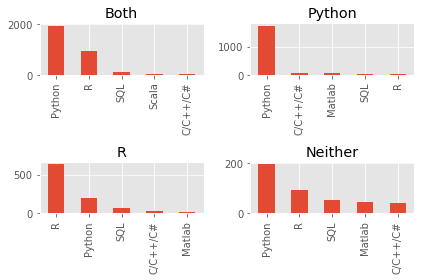

In [196]:
import matplotlib.pyplot as plt
select_both = grouped_ser[("Both")].sort_values(ascending = False)[:5]
select_py = grouped_ser[("Python")].sort_values(ascending = False)[:5]
select_r = grouped_ser[("R")].sort_values(ascending = False)[:5]
select_neither = grouped_ser[("Neither")].sort_values(ascending = False)[:5]
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig_titles = ["Both", "Python", "R", "Neither"]
fig_series = [select_both, select_py, select_r, select_neither]
for i, j, k in zip([0, 0, 1, 1], [0, 1, 0, 1], range(4)):
  fig_series[k].plot.bar(ax = axes[i, j])
  axes[i, j].set_title(fig_titles[k])
  axes[i, j].set_xlabel("")
plt.tight_layout()

## 为什么大学城的房价较为保值？
https://medium.com/datainpoint/university-of-michigan-introduction-to-data-science-in-python-%E7%9A%84%E7%AC%AC%E5%9B%9B%E9%80%B1%E4%BD%9C%E6%A5%AD-hypothesis-testing-37a17225b55a

In [7]:
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}

import pandas as pd
data_url = "https://storage.googleapis.com/um_ds_intro/university_towns.txt"
df = pd.read_table(data_url, header=None)
df.columns = ["StateRegion"]

df["StateFlag"] = df["StateRegion"].str.contains(r"\[edit\]")
df_states = df[df["StateFlag"] == True]


States = df_states["StateRegion"].str.replace(r"\[edit\]", "").unique()
StateFlags = df["StateFlag"].values

j = 0
StateMatchRegion = [States[j]]


for i in range(1, len(StateFlags)):
    if StateFlags[i] == True:
        j += 1
        StateMatchRegion.append(States[j])
    else:
        j += 0
        StateMatchRegion.append(States[j])

df["StateMatchRegion"] = StateMatchRegion
df["RegionName"] = df["StateRegion"].str.replace(r"\s\(.*", "")

ans = df[df["StateFlag"] == False]
ans = ans.drop(["StateRegion", "StateFlag"], axis=1)
ans.columns = ["State", "RegionName"]


mapping_df = pd.DataFrame({
    "State": list(states.values()),

    "StateAcronyms": list(states.keys())
})

mapping_df.sort_values("State")

,State,StateAcronyms
6,Alabama,AL
8,Alaska,AK
2,American Samoa,AS
25,Arizona,AZ
17,Arkansas,AR
44,California,CA
45,Colorado,CO
35,Connecticut,CT
47,Delaware,DE
14,District of Columbia,DC


In [46]:
data = np.arange(0, 16).reshape(4,4)
data = pd.DataFrame(data, columns= [0,1,2,3])
data

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [48]:
def f(x):
    return x-1

data.loc[:,[1,3]].apply(f)

,1,3
0,0,2
1,4,6
2,8,10
3,12,14


In [49]:
data.loc[[0,1],:].apply(f)

,0,1,2,3
0,-1,0,1,2
1,3,4,5,6


In [52]:
def f(x):
    return x.max()
data.apply(f, axis=0)

0    12
1    13
2    14
3    15
dtype: int64

In [63]:
df = pd.DataFrame({'key1':['a', 'a', 'b', 'b', 'a'],
...     'key2':['one', 'two', 'one', 'two', 'one'],
...     'data1':np.random.randn(5),
...     'data2':np.random.randn(5)})

In [64]:
df

,data1,data2,key1,key2
0,-1.884595,2.044231,a,one
1,-1.852213,0.254327,a,two
2,1.710440,-0.265435,b,one
3,-1.240695,-1.254072,b,two
4,-0.505456,2.386115,a,one


In [75]:
a = df.groupby(["key1", "key2"])[["data1"]].mean()
a

data1
key1 key2          
a    one  -1.195025
     two  -1.852213
b    one   1.710440
     two  -1.240695

In [73]:
a.unstack()

key2,one,two
key1,,
a,-1.195025,-1.852213
b,1.710440,-1.240695


In [88]:
df.groupby(["key1", "key2"])[["data2"]].mean()

data2
key1 key2          
a    one   2.215173
     two   0.254327
b    one  -0.265435
     two  -1.254072

In [90]:
people = pd.DataFrame(np.random.randn(5, 5),
...     columns=['a', 'b', 'c', 'd', 'e'],
...     index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis']
... )
people

,a,b,c,d,e
Joe,0.775631,-0.145310,0.348543,1.307250,0.233906
Steve,-1.565228,1.861997,1.008430,-0.258817,0.467808
Wes,0.677001,-0.158020,-0.781330,1.124219,0.637950
Jim,-0.149629,0.546723,1.128679,0.015265,0.177909
Travis,-0.232306,0.643257,-0.797988,-1.391517,0.916946


In [94]:
people.loc[2:3, ["b", "c"]] = np.nan
people

,a,b,c,d,e
Joe,0.775631,-0.145310,0.348543,1.307250,0.233906
Steve,-1.565228,1.861997,1.008430,-0.258817,0.467808
Wes,0.677001,NaN,NaN,1.124219,0.637950
Jim,-0.149629,0.546723,1.128679,0.015265,0.177909
Travis,-0.232306,0.643257,-0.797988,-1.391517,0.916946


In [98]:
mapping = {"a": "red", "b":"red", "c":"blue",
          "d":"blue", "e":"red", }
by_column = people.groupby(mapping,axis=1)
by_column.sum()

,blue,red
Joe,1.655793,0.864227
Steve,0.749613,0.764577
Wes,1.124219,1.314951
Jim,1.143944,0.575004
Travis,-2.189505,1.327897


In [105]:
people.groupby(len).sum()

,a,b,c,d,e
3,1.303004,0.401413,1.477222,2.446734,1.049765
5,-1.565228,1.861997,1.008430,-0.258817,0.467808
6,-0.232306,0.643257,-0.797988,-1.391517,0.916946


In [119]:
columns = pd.MultiIndex.from_arrays([["US", "US", "US", "JP", "JP"],
                                    [1,3,5,1,3]], names=["nation", "tenor"])
hier_df = pd.DataFrame(np.random.randn(4,5),columns=columns)
print(columns)
hier_df

MultiIndex(levels=[['JP', 'US'], [1, 3, 5]],
           labels=[[1, 1, 1, 0, 0], [0, 1, 2, 0, 1]],
           names=['nation', 'tenor'])


nation        US                            JP          
tenor          1         3         5         1         3
0       1.369016 -0.459267 -0.398027 -0.699871  0.576515
1       0.480856 -0.749083  0.273895  1.482536  0.765083
2      -0.614638  0.534502  1.418628 -0.565760  0.878506
3       1.141097 -1.075505  0.123026  1.208875 -1.463030

In [123]:
hier_df.groupby(level="nation", axis=1).count()

nation,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


In [124]:
people=pd.DataFrame(np.random.randn(5,5),
                   columns=list('abcde'),
                   index=['Joe','Steve','Wes','Jim','Travis'])
people

,a,b,c,d,e
Joe,0.471192,-0.005091,0.727979,-0.141321,-1.730351
Steve,-1.184924,0.112917,2.129131,-0.329352,0.776768
Wes,0.373266,-0.358836,1.228211,-0.354700,0.887132
Jim,1.005965,1.011236,-0.355244,1.178753,-0.131825
Travis,-1.495055,2.346160,-0.299128,-0.192415,0.360861


In [125]:
key=['one','two','one','two','one']
people.groupby(key).mean()

,a,b,c,d,e
one,-0.216865,0.660744,0.552354,-0.229479,-0.160786
two,-0.089480,0.562077,0.886943,0.424700,0.322472


In [96]:
df = pd.DataFrame({'a': [1, 10, 8, 11, -1],
                 'b': list('abdce'),
                 'c': [1.0, 2.0, np.nan, 3.0, 4.0]})
df.nlargest(3, "a")

,a,b,c
3,11,c,3.0
1,10,b,2.0
2,8,d,NaN


In [11]:
import pandas as pd
import numpy as np

In [14]:
frame=pd.DataFrame({'data1':np.random.randn(1000),
                   'data2': np.random.randn(1000)})
frame[:5]

,data1,data2
0,0.090621,-1.312116
1,0.745358,-2.173993
2,0.484317,-0.073326
3,-0.884618,0.175660
4,0.315213,1.644142


In [16]:
factor = pd.cut(frame.data1, 4)
factor[:10]

0    (-1.213, 0.292]
1     (0.292, 1.798]
2     (0.292, 1.798]
3    (-1.213, 0.292]
4     (0.292, 1.798]
5     (1.798, 3.303]
6    (-1.213, 0.292]
7    (-1.213, 0.292]
8     (0.292, 1.798]
9     (1.798, 3.303]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-2.725, -1.213] < (-1.213, 0.292] < (0.292, 1.798] < (1.798, 3.303]]

In [19]:
def get_stats(group):
    return {"min": group.min(), "max":group.max(), "count": group.count(), "mean":group.mean()}

grouped = frame.data2.groupby(factor).apply(get_stats)
grouped.unstack()

,count,max,mean,min
data1,,,,
"(-2.725, -1.213]",104.0,2.574173,-0.102332,-2.855225
"(-1.213, 0.292]",518.0,2.473238,-0.010186,-2.485082
"(0.292, 1.798]",345.0,2.440775,0.043915,-2.412243
"(1.798, 3.303]",33.0,1.615915,-0.380996,-2.130832


In [22]:
grouping = pd.qcut(frame.data1, 10, labels=False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
0,100.0,2.574173,-0.098003,-2.855225
1,100.0,1.845765,0.014096,-2.316316
2,100.0,1.750318,-0.138772,-2.006058
3,100.0,1.943351,-0.092728,-2.485082
4,100.0,2.149521,0.015871,-2.335532
5,100.0,2.473238,0.112073,-1.968461
6,100.0,1.823485,-0.037274,-2.412243
7,100.0,2.440775,0.005183,-2.289896
8,100.0,1.874981,0.134230,-1.555269
